In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'climate_change_impact_on_agriculture_2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [4]:
data['Crop_Type'].value_counts()

Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Sugarcane      995
Fruits         979
Soybeans       958
Barley         952
Coffee         945
Name: count, dtype: int64

In [5]:
data['Country'].value_counts()

Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64

<Axes: ylabel='count'>

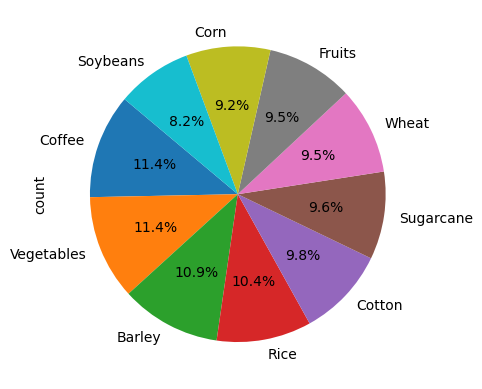

In [6]:
data[data['Country'] == "USA"]["Crop_Type"].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)# crop typs in USA

<Axes: ylabel='count'>

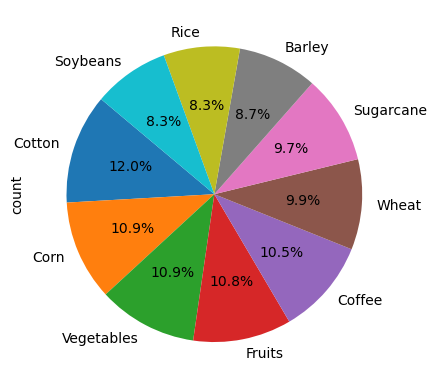

In [7]:
data[data['Country'] == "Australia"]["Crop_Type"].value_counts() .plot.pie(autopct='%1.1f%%', startangle=140)# crop typs in India

<Axes: ylabel='count'>

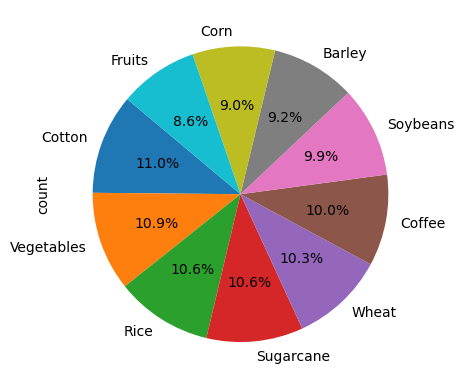

In [8]:
data[data['Country'] == "China"]["Crop_Type"].value_counts() .plot.pie(autopct='%1.1f%%', startangle=140)

In [9]:
data['Crop_Yield_MT_per_HA'].describe()

count    10000.000000
mean         2.240017
std          0.998342
min          0.450000
25%          1.449000
50%          2.170000
75%          2.930000
max          5.000000
Name: Crop_Yield_MT_per_HA, dtype: float64

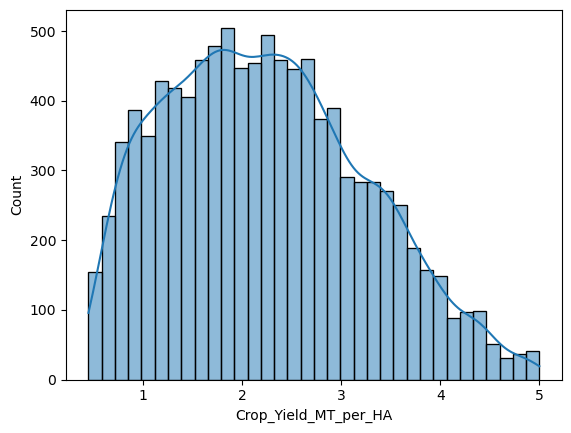

In [10]:
# histogram 

sns.histplot(data['Crop_Yield_MT_per_HA'], kde=True)
plt.show()

Observaciones:
1. Asimetría positiva
2. La mayoría de los valores se concentran entre 1 y 3 toneladas métricas por hectárea (TM/HA)
3. Posibles valores atípicos: Hay relativamente menos observaciones de rendimientos de cultivos superiores a 4 TM/HA.

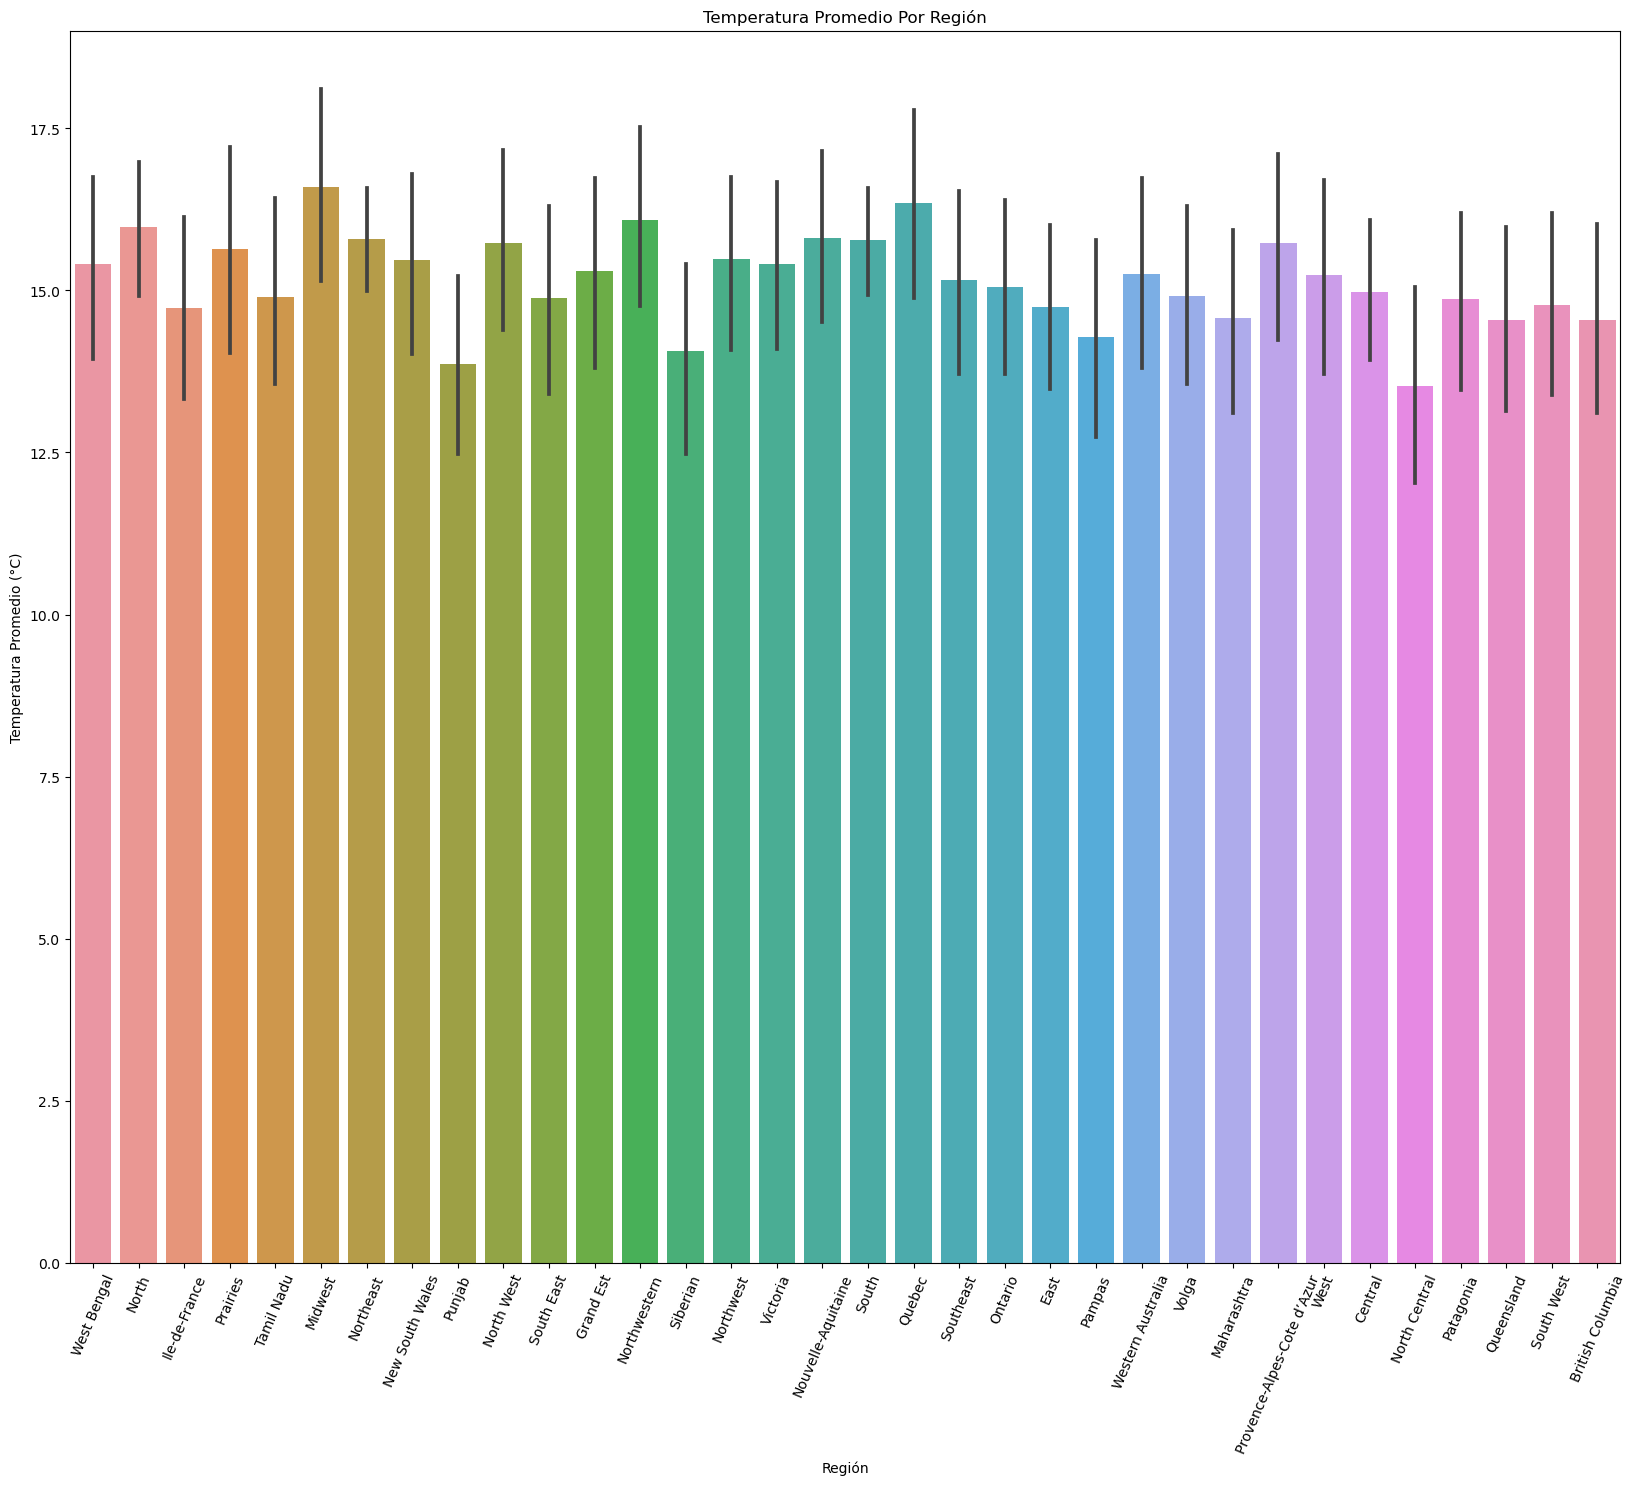

In [11]:
plt.figure(figsize=(20, 16))
sns.barplot(x='Region', y='Average_Temperature_C', data=data, estimator='mean')
plt.title('Temperatura Promedio Por Región')
plt.xlabel('Región')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=67)
plt.show()

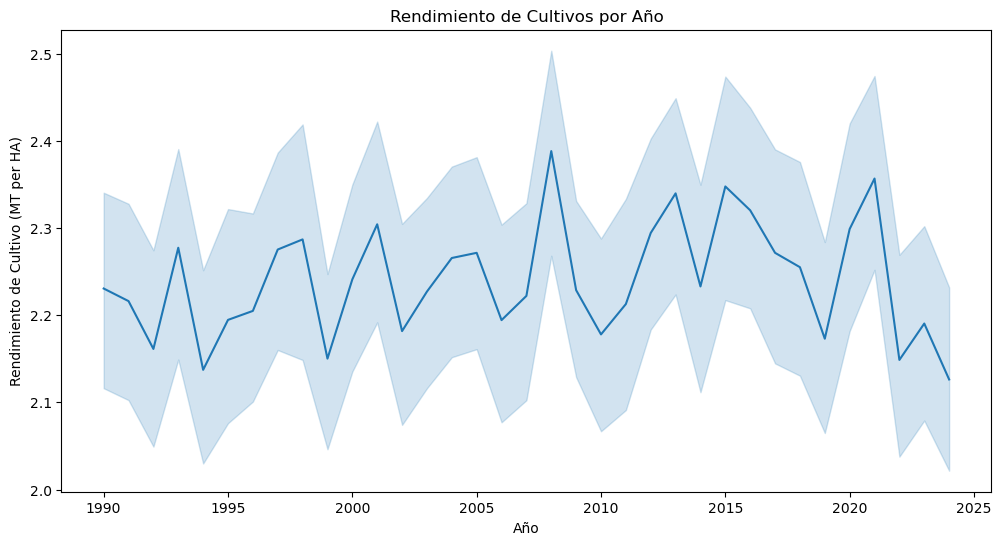

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Rendimiento de Cultivos por Año')
plt.xlabel('Año')
plt.ylabel('Rendimiento de Cultivo (MT per HA)')
plt.show()

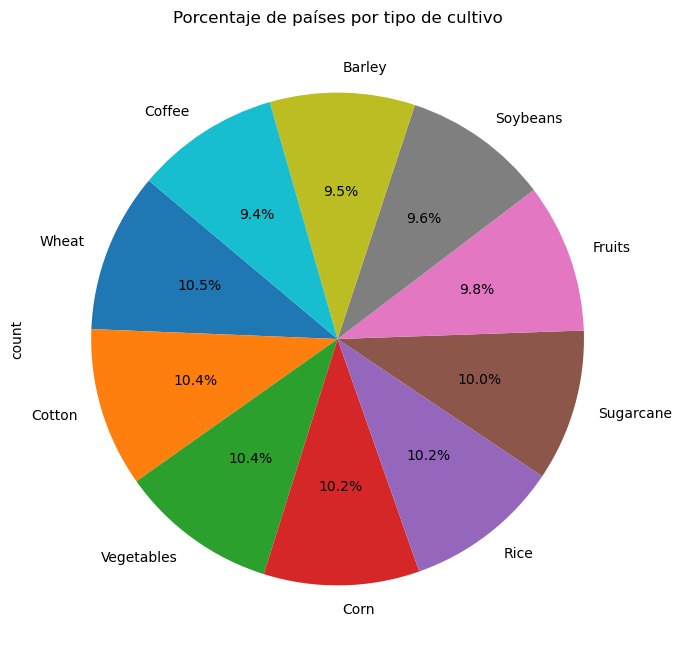

In [13]:
plt.figure(figsize=(8, 8))
data['Crop_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de países por tipo de cultivo')
plt.show()


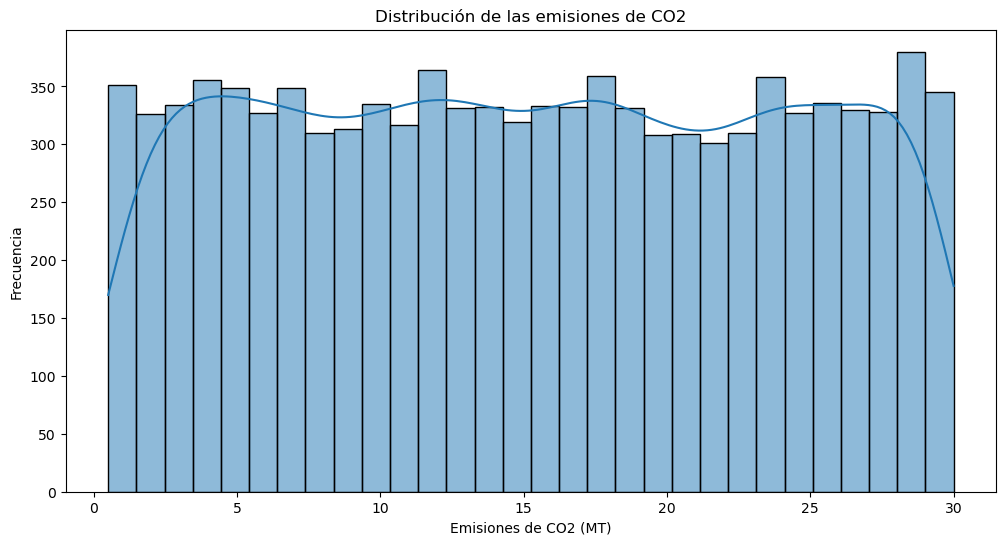

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data['CO2_Emissions_MT'], bins=30, kde=True)
plt.title('Distribución de las emisiones de CO2')
plt.xlabel('Emisiones de CO2 (MT)')
plt.ylabel('Frecuencia')
plt.show()

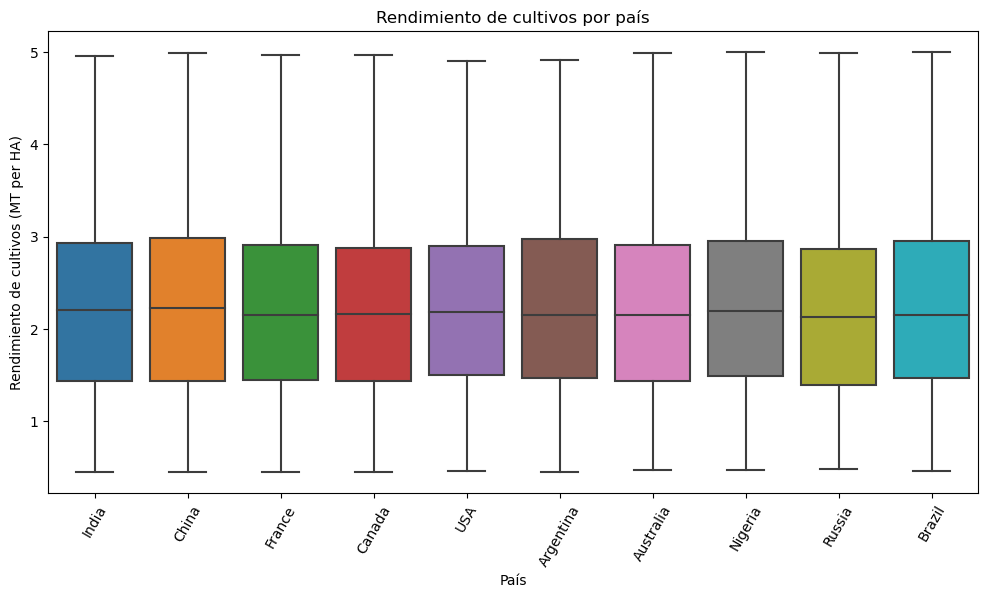

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Rendimiento de cultivos por país')
plt.xlabel('País')
plt.ylabel('Rendimiento de cultivos (MT per HA)')
plt.xticks(rotation=60)
plt.show()


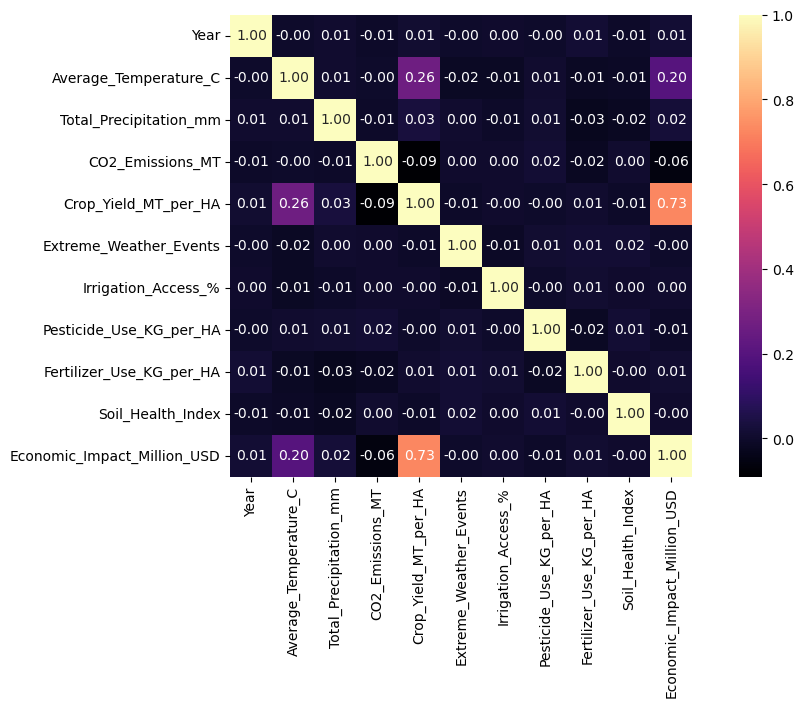

In [16]:
# correlatino matrix 
plt.figure(figsize=(12,6))
corr_mat = data.corr(numeric_only=True) 
sns.heatmap(corr_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap= 'magma')
plt.show()

/Users/sebastianloeza/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


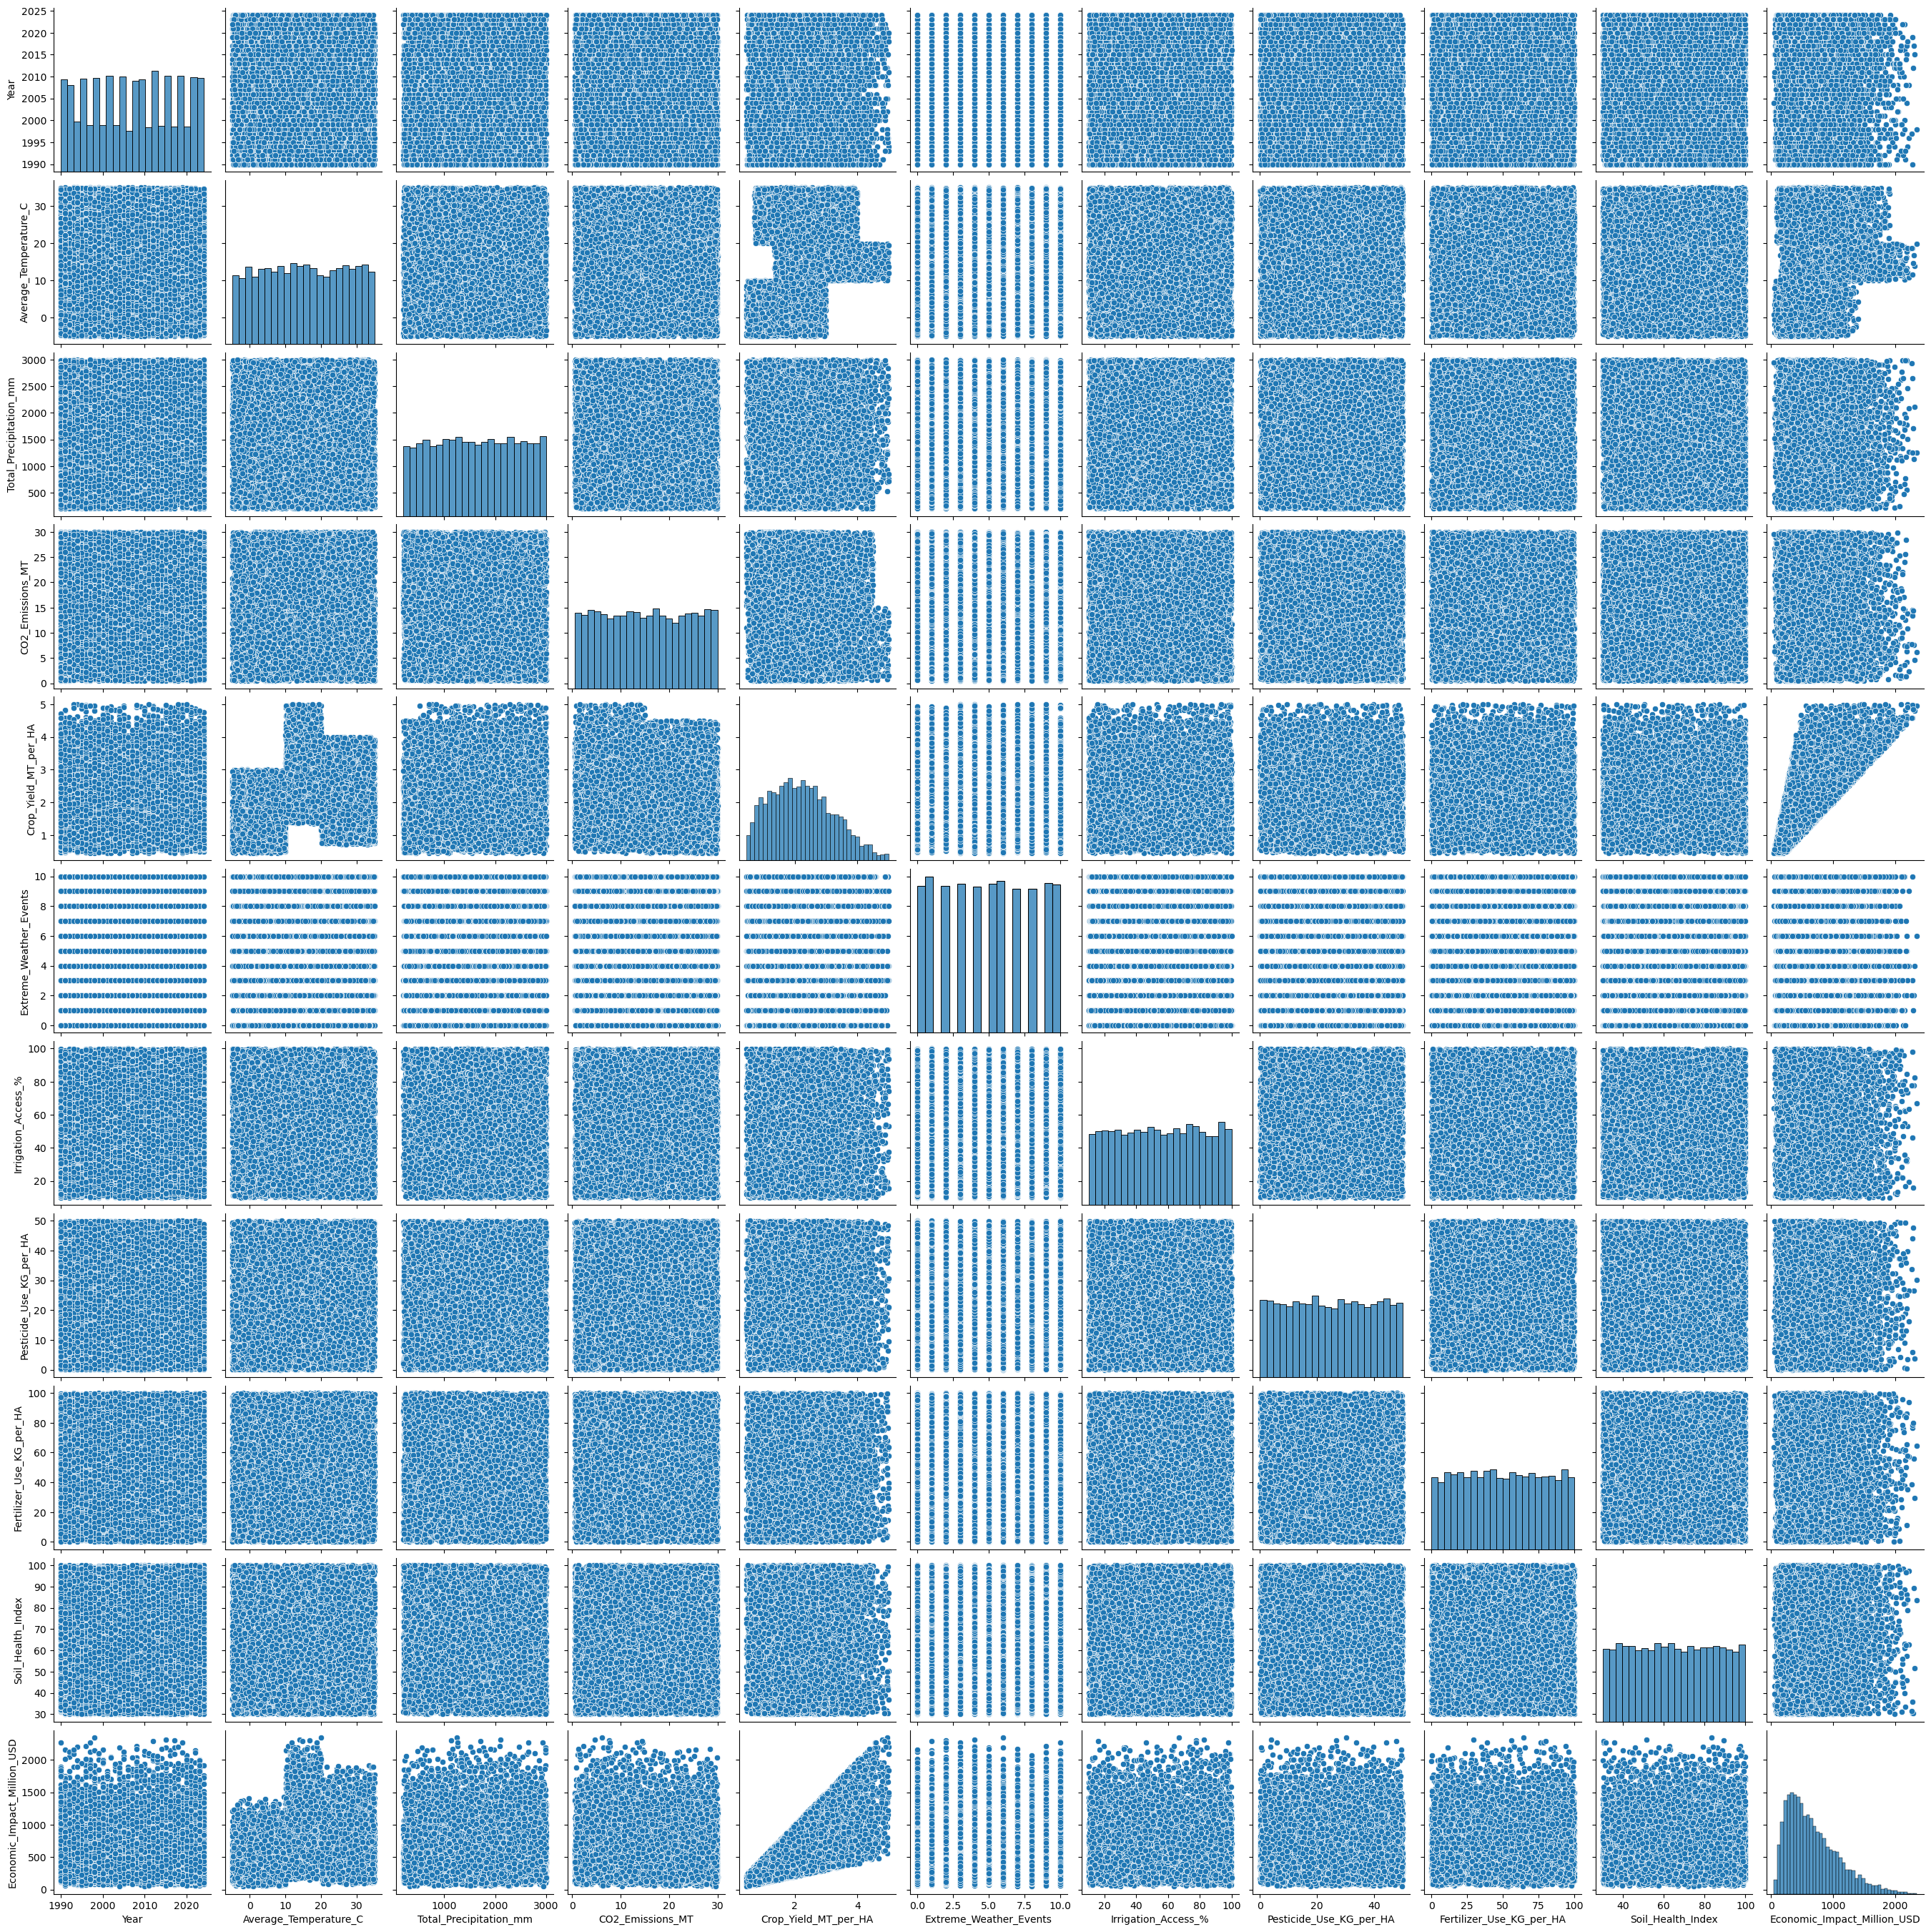

In [17]:
sns.pairplot(data)

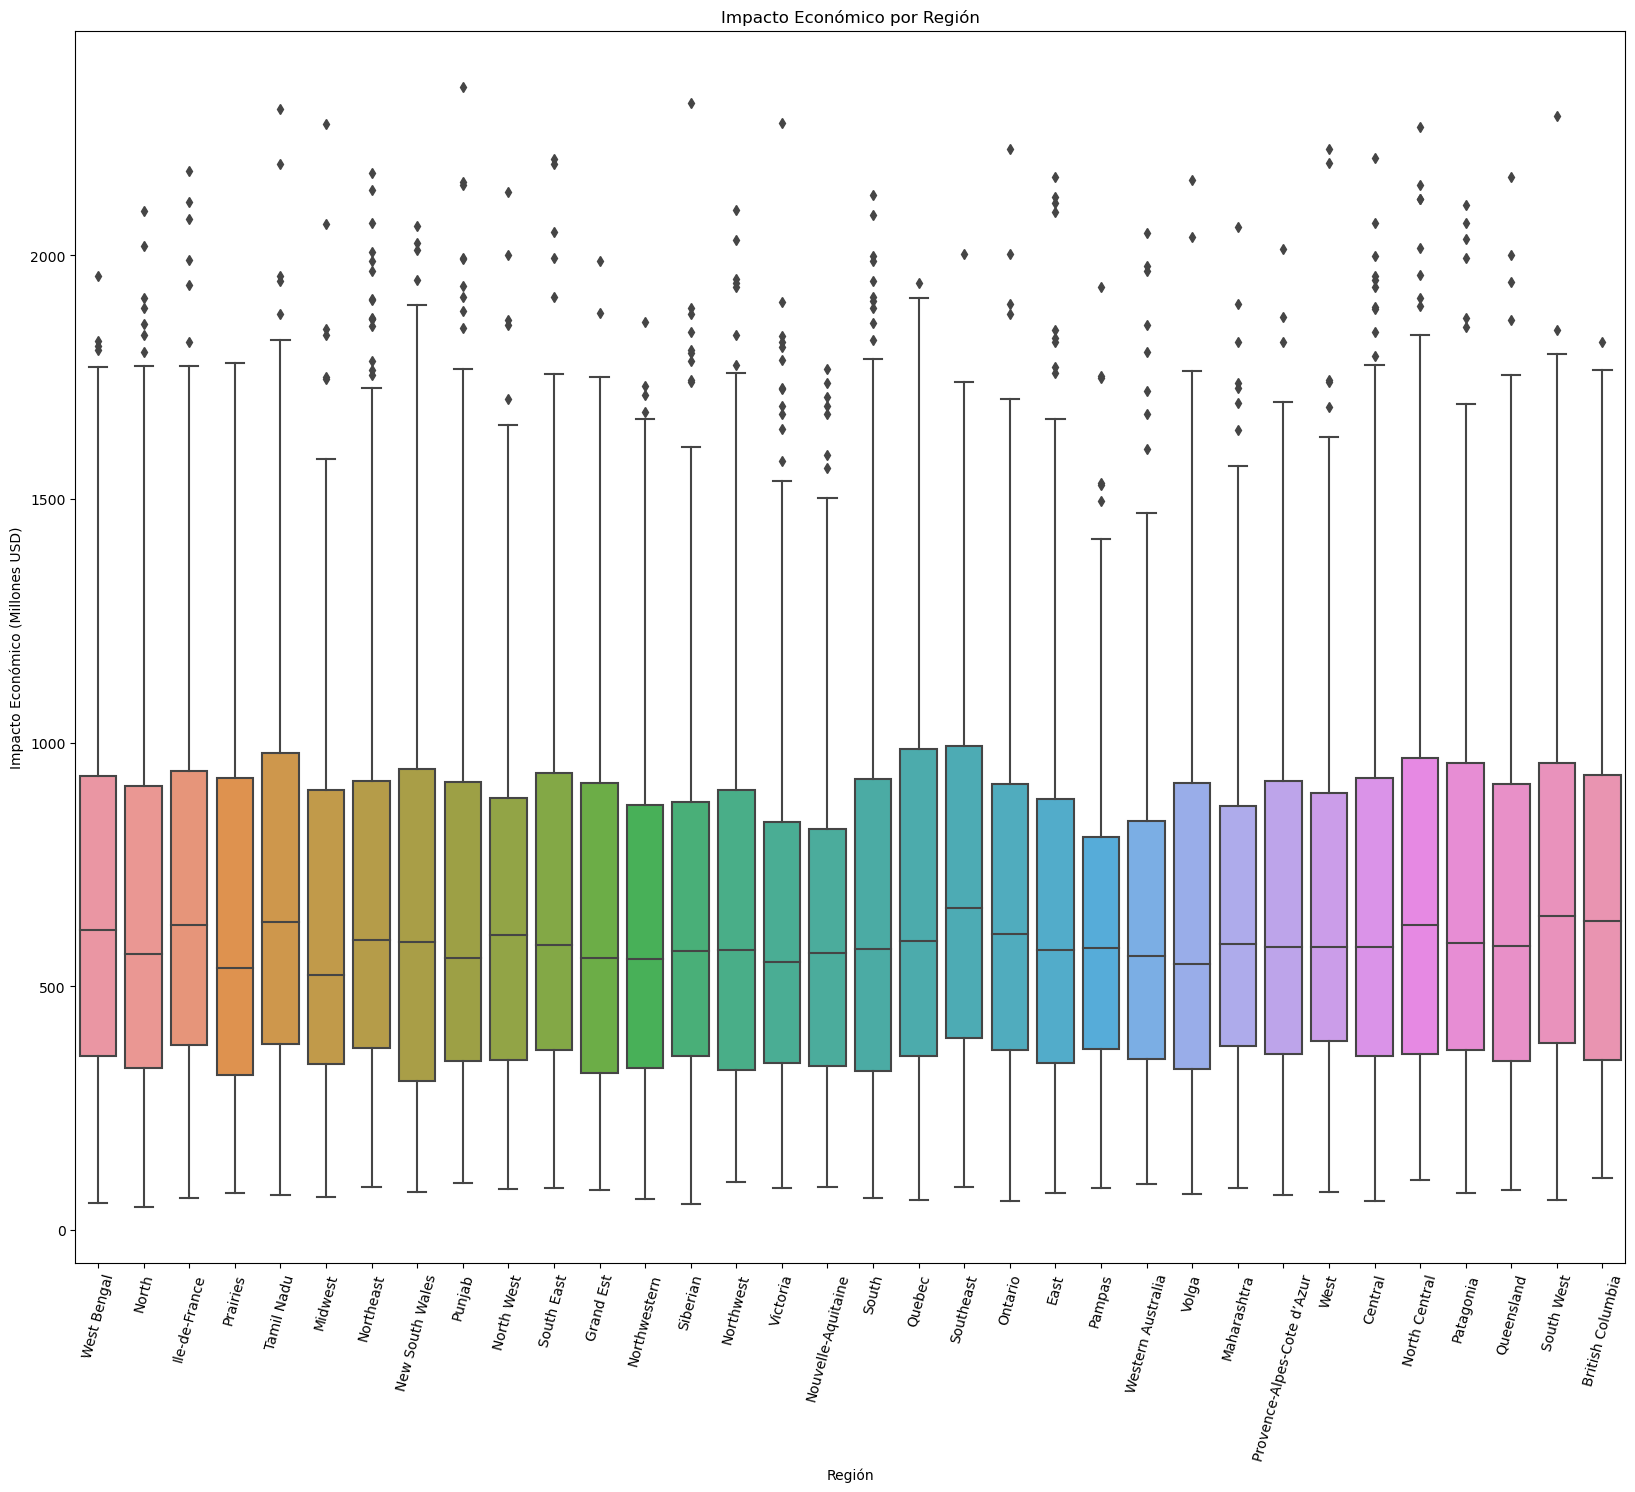

In [18]:
plt.figure(figsize=(20, 16))
sns.boxplot(x='Region', y='Economic_Impact_Million_USD', data=data)
plt.title('Impacto Económico por Región')
plt.xlabel('Región')
plt.ylabel('Impacto Económico (Millones USD)')
plt.xticks(rotation=75)
plt.show()

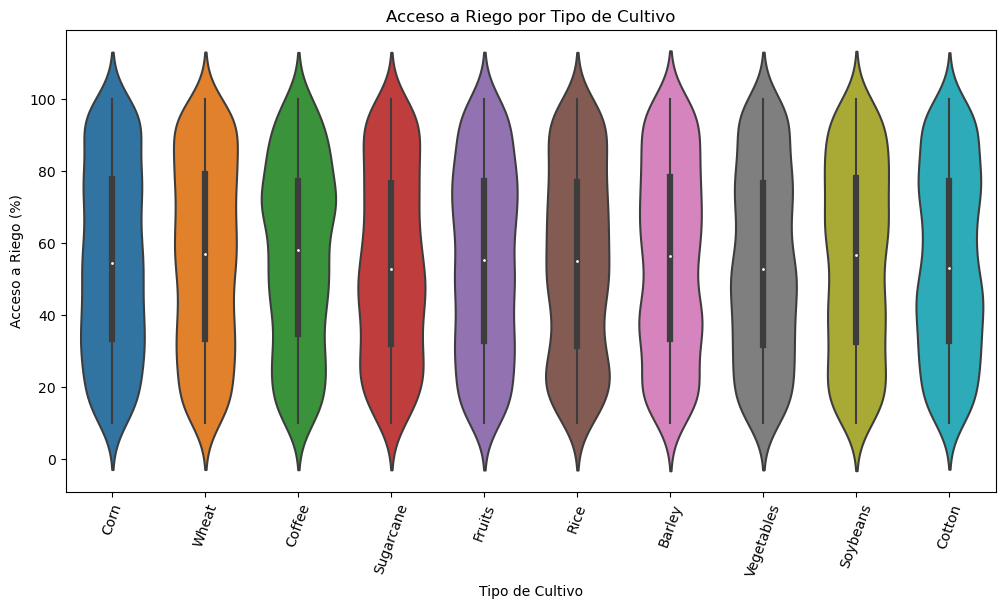

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Crop_Type', y='Irrigation_Access_%', data=data)
plt.title('Acceso a Riego por Tipo de Cultivo')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('Acceso a Riego (%)')
plt.xticks(rotation=70)
plt.show()

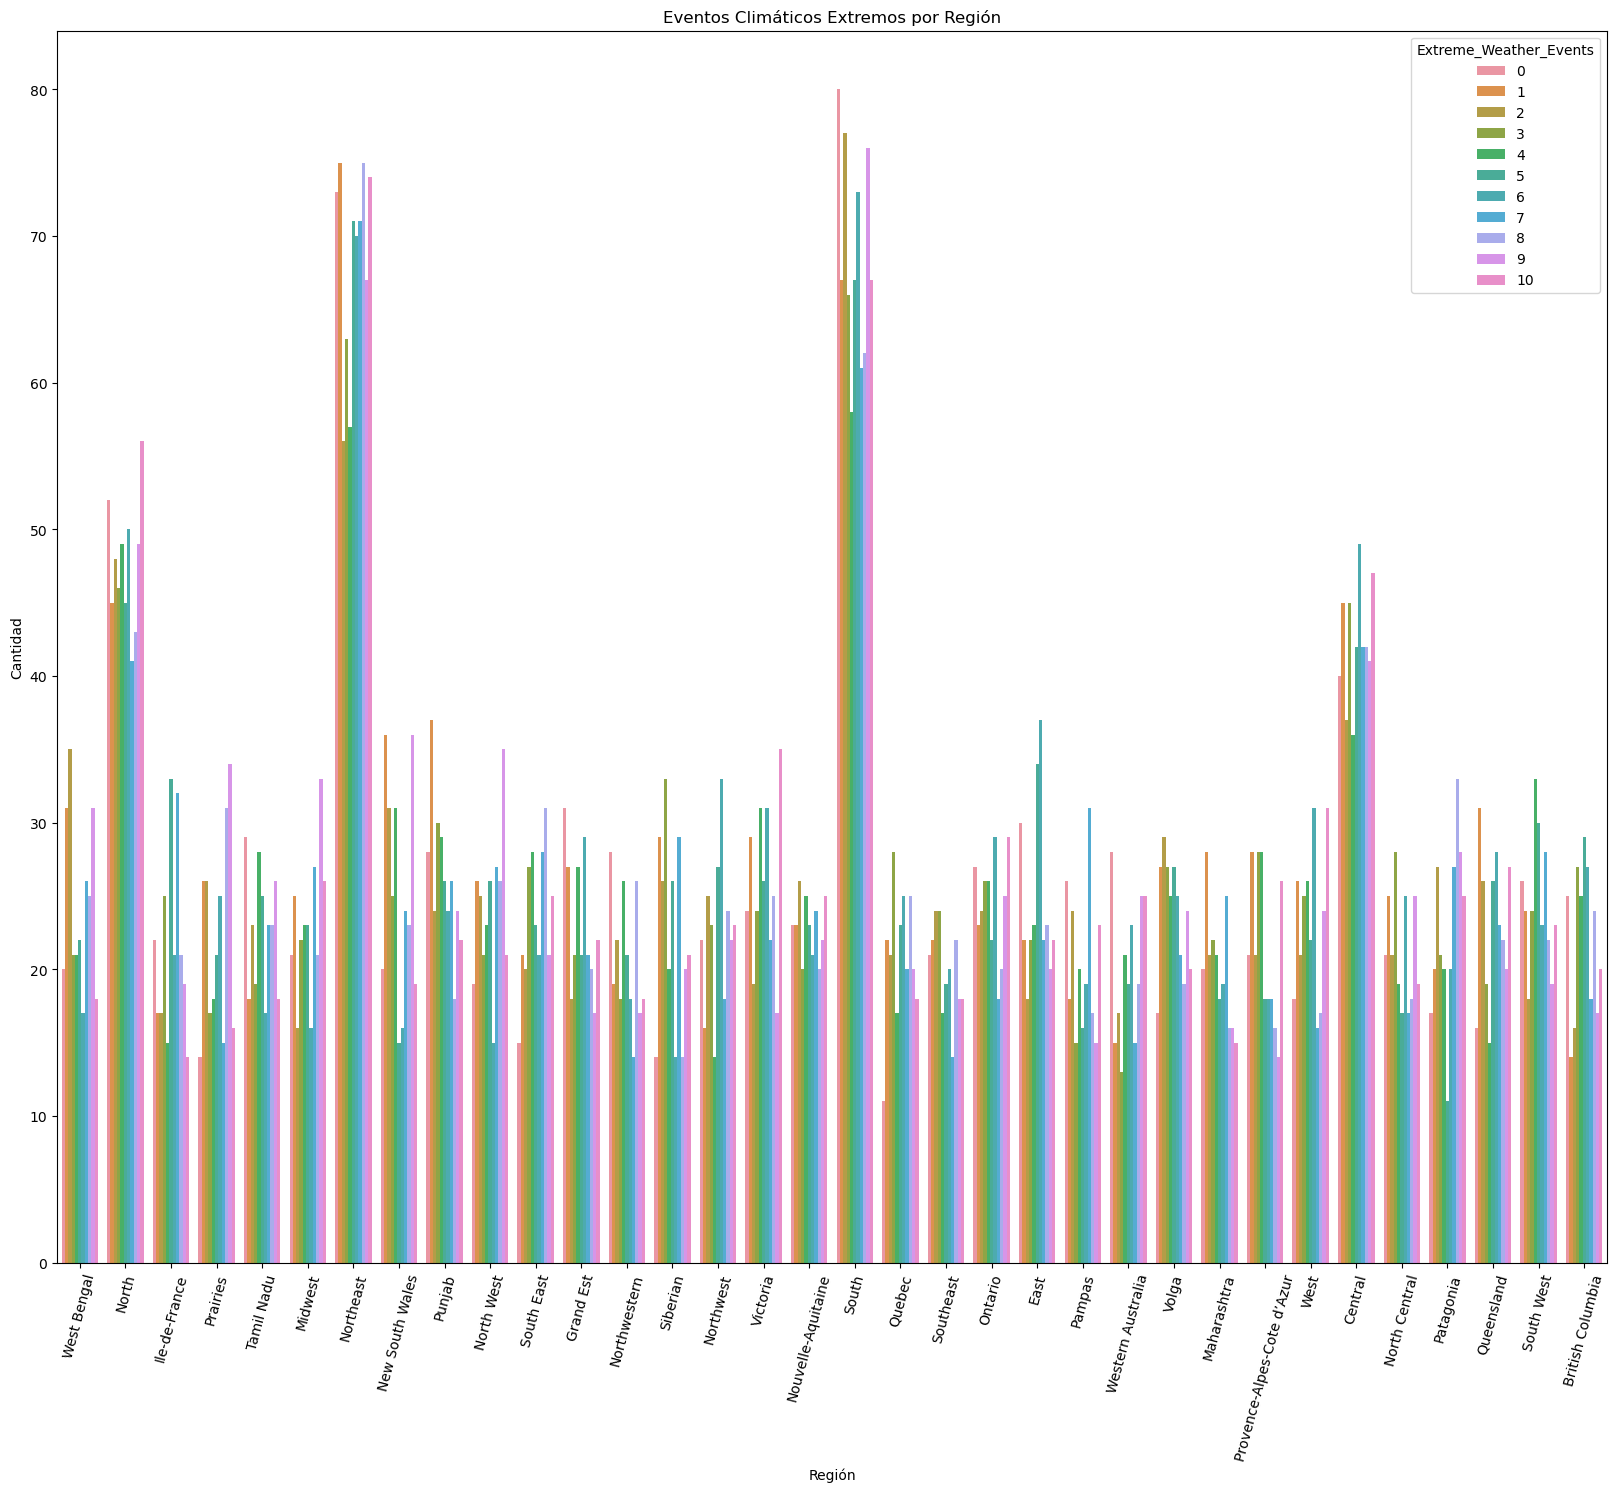

In [20]:
plt.figure(figsize=(20, 16))
sns.countplot(x='Region', hue='Extreme_Weather_Events', data=data)
plt.title('Eventos Climáticos Extremos por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.xticks(rotation=75)
plt.show()

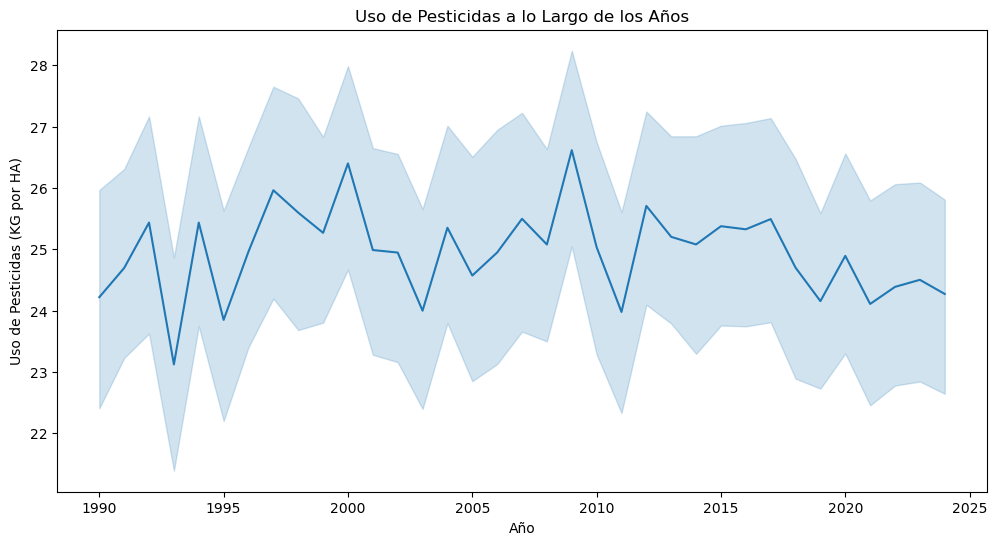

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Pesticide_Use_KG_per_HA', data=data)
plt.title('Uso de Pesticidas a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Uso de Pesticidas (KG por HA)')
plt.show()

<Axes: xlabel='Adaptation_Strategies', ylabel='Crop_Yield_MT_per_HA'>

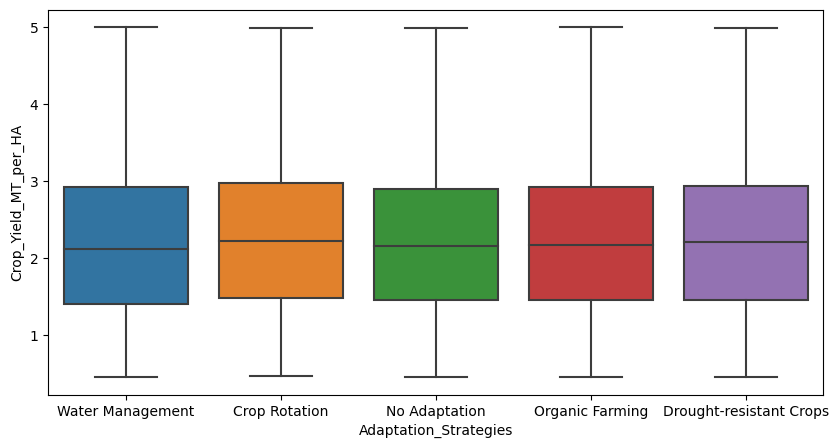

In [22]:
var = 'Adaptation_Strategies' 
data = pd.concat([data['Crop_Yield_MT_per_HA'], data[var]], axis = 1) 
plt.figure(figsize=(10,5))
sns.boxplot(x = var, y = 'Crop_Yield_MT_per_HA', data=data) 

In [23]:
data = pd.read_csv(file_path)
data.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

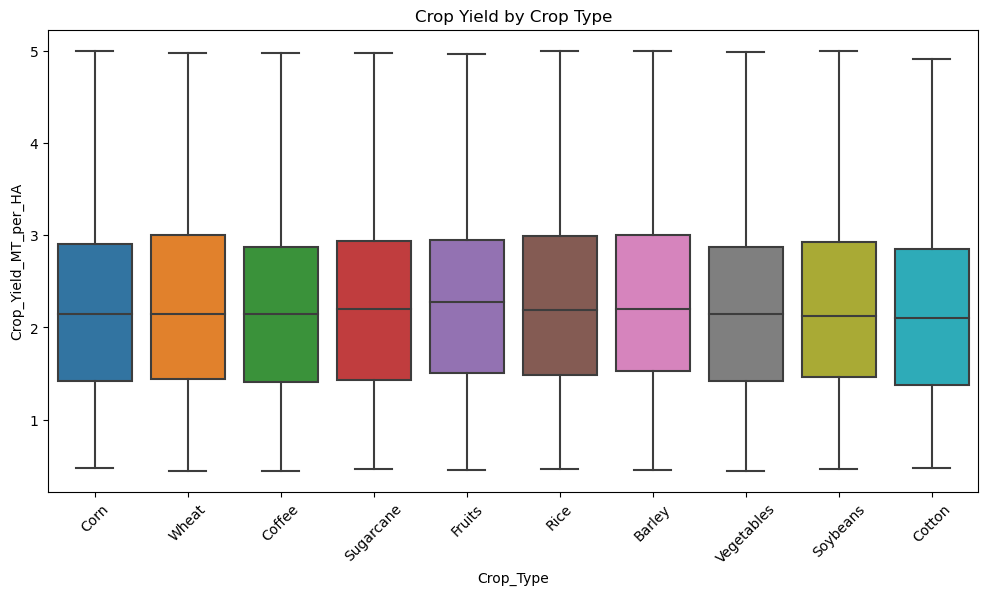

In [24]:
#  Boxplot for Crop Yield by Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop_Type', y='Crop_Yield_MT_per_HA', data=data)
plt.title('Crop Yield by Crop Type')
plt.xticks(rotation=45)
plt.show()